__Xiangyi Cheng (xxc283)__

# Concepts
Receiver Operating Characteristic curve (ROC curve) is a plot of true positive rate against the false positive rate for the different possible cutpoints of a diagnositic test. ROC curve is definitely useful in computer vision for evaluating the detection results.

To collect different ROC from a single detection, controlling the signal to noise ratio to get images with various amount of noise is a practical way. So the basic idea of my work is to add two different types of noise into the original image in Exercise3 and do the detection. ROC curve will be analyzed based on the results. 

# Implement
OpenCV, numpy, scipy and matplotlib is imported as the first step.

In [1]:
from scipy import misc
import numpy as np
import cv2
import matplotlib.pyplot as plt

Read the image as an array by misc.imread(). 'L' mode represents the image is processed in 8 pixel, black and white.  

In [2]:
img=misc.imread('eecs531-xxc283/A1/shapes.jpg',mode='L')

Add noise into image. First noise is created by the standard deviation of the image multiply a random matrix whose size is equal to the original image size. Some coefficent are also involved into the calculation to justify the peak of the noise. Unless the standard deviation is used in the first noise, the maximum value in the image is considered to be used in the second one so that the noise is much bigger than the first one.

In [3]:
noisy1=img+4*img.std()*np.random.random(img.shape)
noisy2=img+6*img.max()*np.random.random(img.shape)

Then two new images with different noises are saved.

In [4]:
img1=cv2.imwrite('eecs531-xxc283/A1/shape_noise1.jpg',noisy1)
img2=cv2.imwrite('eecs531-xxc283/A1/shape_noise2.jpg',noisy2)

The original image, image with less noise and image with more noise are shown blow.

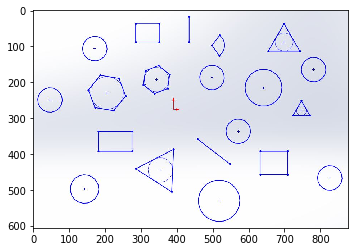

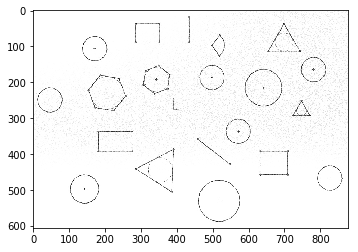

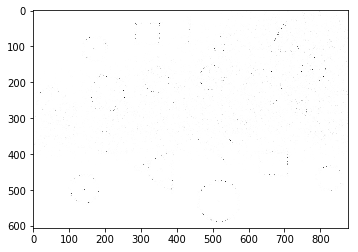

In [5]:
shape=cv2.imread('eecs531-xxc283/A1/shapes.jpg')
shape1=cv2.cvtColor(shape,cv2.COLOR_BGR2RGB)
plt.imshow(shape1)
plt.show()
shape_noise1=cv2.imread('eecs531-xxc283/A1/shape_noise1.jpg')
shape_less_noise=cv2.cvtColor(shape_noise1,cv2.COLOR_BGR2RGB)
plt.imshow(shape_less_noise)
plt.show()
shape_noise2=cv2.imread('eecs531-xxc283/A1/shape_noise2.jpg')
shape_more_noise=cv2.cvtColor(shape_noise2,cv2.COLOR_BGR2RGB)
plt.imshow(shape_more_noise)
plt.show()

After collecting the images, some detections should be done to get the different ROC curve. The detection steps are the same as the one in Excercise3. The threshold is set to 0.8 as an example.

In [6]:
# shape_noise1.jpg detection
shape_noise1_gray=cv2.cvtColor(shape_noise1,cv2.COLOR_BGR2GRAY)

template=cv2.imread('eecs531-xxc283/A1/template.jpg',0)
w,h=template.shape[::-1] # returns all elements except for the last one.

result1=cv2.matchTemplate(shape_noise1_gray,template,cv2.TM_CCOEFF_NORMED)
threshold1=0.8
location1=np.where(result1>=threshold1)
for pt1 in zip(*location1[::-1]):
	cv2.rectangle(shape_noise1,pt1,(pt1[0]+w,pt1[1]+h),(255,255,0),1)
cv2.imwrite('eecs531-xxc283/A1/shape_noise1_detection.jpg',shape_noise1)

# shape_noise2.jpg detection
shape_noise2_gray=cv2.cvtColor(shape_noise2,cv2.COLOR_BGR2GRAY)
result2=cv2.matchTemplate(shape_noise2_gray,template,cv2.TM_CCOEFF_NORMED)
threshold2=0.8
location2=np.where(result2>=threshold2)

for pt2 in zip(*location2[::-1]):
	cv2.rectangle(shape_noise2,pt2,(pt2[0]+w,pt2[1]+h),(255,255,0),1)
cv2.imwrite('eecs531-xxc283/A1/shape_noise2_detection.jpg',shape_noise2)

True

Show the detection result for the original image, image with less noise and image with more noise when the threshold is 0.8.

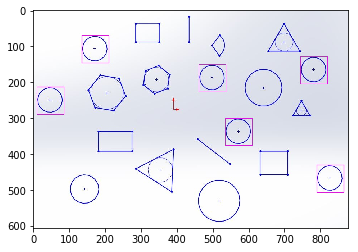

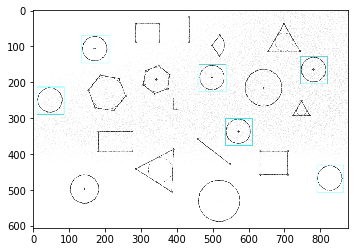

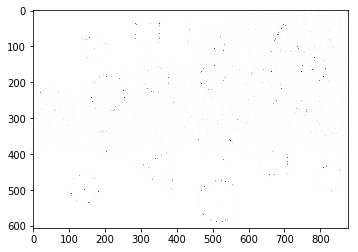

In [7]:
# original image detection result 
original_result=cv2.imread('eecs531-xxc283/A1/detection_0.8.jpg')
original_result=cv2.cvtColor(original_result,cv2.COLOR_BGR2RGB)
plt.imshow(original_result)
plt.show()
# shape_noise1.jpg detection result 
noise1_result=cv2.imread('eecs531-xxc283/A1/shape_noise1_detection.jpg')
noise1_result=cv2.cvtColor(noise1_result,cv2.COLOR_BGR2RGB)
plt.imshow(noise1_result)
plt.show()
# shape_noise2.jpg detection result
noise2_result=cv2.imread('eecs531-xxc283/A1/shape_noise2_detection.jpg')
noise2_result=cv2.cvtColor(noise2_result,cv2.COLOR_BGR2RGB)
plt.imshow(noise2_result)
plt.show()

From the results above, noise do affects the detection performance and then different ROC curves can be plotted.

To get the value of true positive rate and false positive rate, threshold from 0.1 to 0.9 with 0.1 difference are tested for each image. Input the values into python to plot the ROC curve.

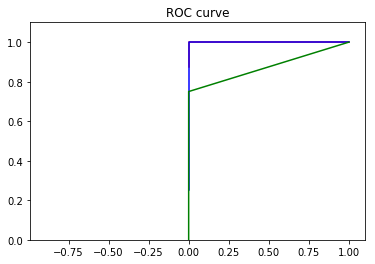

In [8]:
x=(0,0,0,0,0,0,0.04,0.5,0.9,1)
y=(0.875,0.875,0.875,0.875,1,1,1,1,1,1)

x_n1=(0,0,0,0,0,0,0.039,0.5,0.9,1)
y_n1=(0.25,0.75,0.75,0.75,0.875,1,1,1,1,1)

x_n2=(0,0,0,0,0,0,0,0,0.5,1)
y_n2=(0,0,0,0,0,0,0.125,0.75,0.875,1)

plt.plot(x,y,'r',x_n1,y_n1,'b',x_n2,y_n2,'g')
f=plt.gca()
plt.xlim(-0.99,1.1)
plt.ylim(0,1.1)
plt.title('ROC curve')

plt.show()

However, the plot is not smooth as I want. I input the data into MATLAB and plot another smooth ROC.

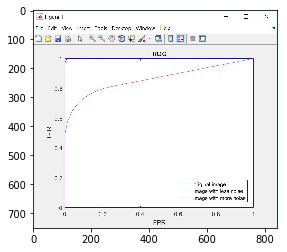

In [9]:
roc=cv2.imread('eecs531-xxc283/A1/ROC.jpg')
roc=cv2.cvtColor(roc,cv2.COLOR_BGR2RGB)
plt.imshow(roc)
plt.show()

# Conclusion and Analysis
According to the ROC curves, original image shows the best performance in detection due to closed-to-left corner. The image with more noise is the worst during the detection caused by faded and unclear edges. To conclude, images with well pre-processed plays an important role in computer vision.  